<a href="https://colab.research.google.com/github/SohanChidrawar/TY-Programming/blob/main/DSBDA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Analytics II
# 1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.
# 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [ ]:
### In this case gender dont have any impact on the final output

In [ ]:
df.shape

(400, 5)

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
### we can perform exploratory data  analysis to find which columns are related to each other.
### as in this case age and estimated salary is related. as this makes groups
     

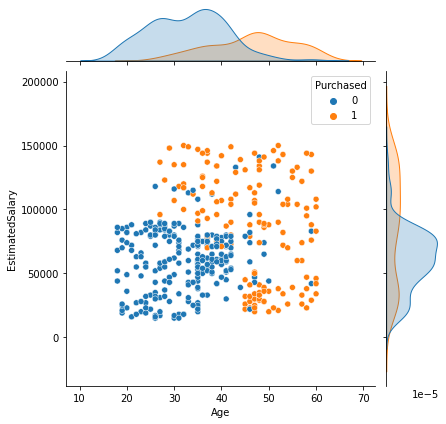

In [ ]:
sns.jointplot(x = 'Age', y='EstimatedSalary', data=df, hue = 'Purchased')

In [ ]:
### we can create the same grouping graph using matplotlib also.

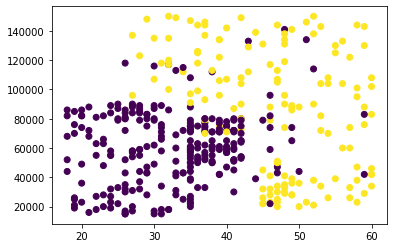

In [ ]:
plt.scatter(df['Age'], df['EstimatedSalary'],c=df['Purchased'])

In [ ]:
### lets sperate the input and output data

In [ ]:
x=df[['Age','EstimatedSalary']]

In [ ]:
y = df['Purchased']

In [ ]:
set(y)

{0, 1}

In [ ]:
### see data is balanced or not

<Axes: xlabel='Purchased', ylabel='count'>

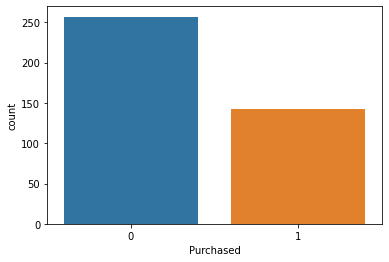

In [ ]:
sns.countplot(x=y)

In [ ]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
### Logistic regression compalsory requied standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
pd.DataFrame(x_scaled).describe()

,0,1
count,4.000000e+02,4.000000e+02
mean,-7.105427e-17,-1.776357e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [ ]:
x_scaled.shape

(400, 2)

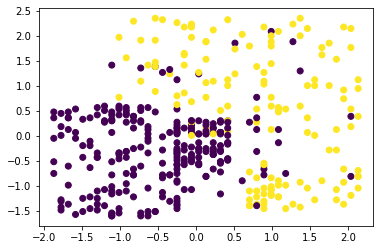

In [ ]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=df['Purchased'])

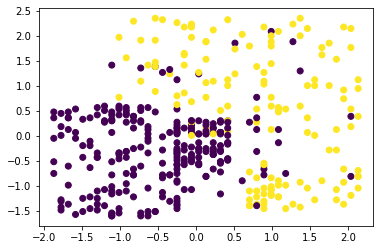

In [ ]:
plt.scatter(pd.DataFrame(x_scaled)[0],pd.DataFrame(x_scaled)[1],c=df['Purchased'])

In [ ]:
### spliting data into training and testing
     

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state =0,test_size=0.25)

In [ ]:
x_train.shape

(300, 2)

In [ ]:
x_test.shape

(100, 2)

In [ ]:
### let build logistic regressionmodel

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(x_train,y_train)

LogisticRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
### model is builded now x_test and y_test will be using to test accuracy of the model

In [ ]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

In [ ]:
### prediction on the test data

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:

result = pd.DataFrame({
    'actual':y_test,
    'predicted values':y_pred
})
   

In [ ]:
result

,actual,predicted values
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [ ]:
sum(result['actual'] == result['predicted values'])

89

Let us see the same things using methods
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.
     

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm        ### rows are actual values,  columns are predicted values

array([[65,  3],
       [ 8, 24]])

In [ ]:
### true positive = 65
### true neg = 24

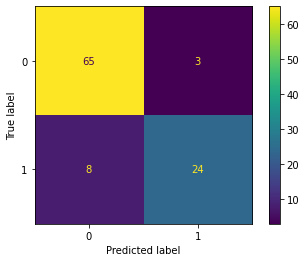

In [ ]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
### TP
cm[0,0,]

65

In [ ]:
##TN
cm[1,1]

24

In [ ]:
### FP
cm[0,1]

3

In [ ]:
### FN
cm[1,0]

8

In [ ]:
accuracy_score(y_test,y_pred)

0.89

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
cm

array([[65,  3],
       [ 8, 24]])

In [ ]:
##recall - individual class accuracy

In [ ]:
### Sensitivity
r0 = 65/68
r0

0.9558823529411765

In [ ]:

### Specificity
r1 = 24/32
r1

0.75

In [ ]:
### Precision of class 0 is called as positive predicted value
p0 = 65/73
p0


0.8904109589041096

In [ ]:
### Precision of class 1 is called as negative predicted value
p1 = 24/27
p1
  

0.8888888888888888

In [ ]:
### f1 score is harmonic mean

In [ ]:
f0 =2 * (p0 * r0) / (p0 + r0)

In [ ]:
f0

0.9219858156028369

In [ ]:
## f1 score
f1 = 2 *(p1*r1) / (p1+r1)
     

In [ ]:
f1

0.8135593220338982

In [ ]:
new1 = [[45,78000]]

In [ ]:
new1 = scaler.transform(new1)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
classifier.predict(new1)

array([1])

In [ ]:
new2 = [[25,20000]]
new2 = scaler.transform(new2)
classifier.predict(new2)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])